<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Mahotas_Fracionado_teste_006_nov_14_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mahotas

In [0]:
# proximas etapas que falta : dividir a foto em 10x10 e aplicar o mahotas em cada foto
# encontrar 
# GLCM?
# COLOCAR MAIS VARIAVEIS NAS FOTOS
# VER QUAIS PARAMETROS USAR PARA CALCULAR O PSD (particle size distribution)
# GERAR AS IMAGENS ARTIFICIAIS

In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
%matplotlib inline

In [0]:
!wget http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip

--2019-11-14 19:44:57--  http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22819538 (22M) [application/zip]
Saving to: ‘quadrado_v2.zip.16’

quadrado_v2.zip.16  100%[===================>]  21.76M  6.91MB/s    in 3.1s    

2019-11-14 19:45:00 (6.91 MB/s) - ‘quadrado_v2.zip.16’ saved [22819538/22819538]



In [0]:
!ls

16_0634.jpg  25_0710.jpg  45_0797.jpg	  quadrado_v2.zip     quadrado_v2.zip.4
16_0639.jpg  30_0732.jpg  45_0802.jpg	  quadrado_v2.zip.1   quadrado_v2.zip.5
16_0640.jpg  30_0735.jpg  70_0816.jpg	  quadrado_v2.zip.10  quadrado_v2.zip.6
18_0655.jpg  30_0737.jpg  70_0818.jpg	  quadrado_v2.zip.11  quadrado_v2.zip.7
18_0656.jpg  35_0751.jpg  70_0821.jpg	  quadrado_v2.zip.12  quadrado_v2.zip.8
18_0658.jpg  35_0757.jpg  quadrada	  quadrado_v2.zip.13  quadrado_v2.zip.9
20_0680.jpg  35_0760.jpg  quadrada.zip	  quadrado_v2.zip.14  sample_data
20_0681.jpg  40_0776.jpg  quadrada.zip.1  quadrado_v2.zip.15
20_0688.jpg  40_0777.jpg  quadrada.zip.2  quadrado_v2.zip.16
25_0703.jpg  40_0780.jpg  quadrada.zip.3  quadrado_v2.zip.2
25_0706.jpg  45_0794.jpg  quadrada.zip.4  quadrado_v2.zip.3


In [0]:
Size=400 # tamanho da foto
Sub_Size=32 # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='quadrado_v2.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
print(file_name)

<zipfile.ZipFile filename='quadrado_v2.zip' mode='r'>


--2019-11-14 19:45:03--  http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22819538 (22M) [application/zip]
Saving to: ‘quadrado_v2.zip.17’

quadrado_v2.zip.17  100%[===================>]  21.76M  6.86MB/s    in 3.2s    

2019-11-14 19:45:07 (6.86 MB/s) - ‘quadrado_v2.zip.17’ saved [22819538/22819538]



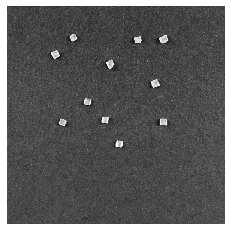

In [0]:
!wget http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip

file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
# all images are load in variable x...
FILE=Transfere
img_name=[]
xw=[]
ww=[]

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #xw.append(cv2.imread(name))
        xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

nrow=len(img_name)
ncol=Size*Size
pw=np.zeros((nrow,ncol))
#pw=[]
for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()

plt.axis("off")
plt.imshow(ww[0], cmap = "gray")

In [0]:
Nomes=['ASM','constrast','correl','variance','inv diff mom','sum aveg',
       'sum var','sum entropy','entropy','dif var','dif entropy','IMC1',
       'IMC2']


In [0]:
#foto 0 (k=0)
k=0
#p_foto=pp[k,:].reshape(Size,Size)
p_foto=pw[k,:].reshape(Size,Size)
GLCM=[]
glcm_haralick=[]
x_ref=[]
Count=Sub_Size
p=np.zeros((Sub_Size,Sub_Size))
j_ref=0
Cada_foto=[]
for k in range(Size):
  if((k+Sub_Size-1)<Size):
    for i in range(Sub_Size):
      for j in range(Sub_Size):
        p[i,j]=p_foto[Crop+i,j+k]
    #plt.imshow(p, cmap = "gray")
    print(p)
    WW=np.copy(p) 
    Cada_foto.append(WW.ravel())
    x_ref.append(Count-Sub_Size)
    Count=Count+1
    
    Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Nomes)
    
    GLCM=[]
    for ii in Nomes:
      GLCM.append(Mahotas[ii].mean())
      #print('cheguei aqui!!!')
    glcm_haralick.append(GLCM)

df=pd.DataFrame(glcm_haralick,columns=Nomes)
print(df)
#print(Cada_foto)

[[107.  98. 109. ... 119. 114. 111.]
 [112. 114. 109. ... 131. 118. 107.]
 [116. 111. 124. ... 127. 113. 119.]
 ...
 [115. 106. 122. ... 113. 112. 117.]
 [113. 114. 128. ... 134. 119. 122.]
 [118. 103. 112. ... 117. 125. 123.]]
[[ 98. 109. 118. ... 114. 111. 115.]
 [114. 109. 116. ... 118. 107. 110.]
 [111. 124. 117. ... 113. 119. 116.]
 ...
 [106. 122. 101. ... 112. 117. 122.]
 [114. 128. 104. ... 119. 122. 123.]
 [103. 112. 115. ... 125. 123. 113.]]
[[109. 118. 111. ... 111. 115. 107.]
 [109. 116. 110. ... 107. 110. 118.]
 [124. 117. 112. ... 119. 116. 114.]
 ...
 [122. 101. 105. ... 117. 122. 115.]
 [128. 104. 110. ... 122. 123. 103.]
 [112. 115. 119. ... 123. 113. 112.]]
[[118. 111. 112. ... 115. 107. 121.]
 [116. 110. 105. ... 110. 118. 119.]
 [117. 112. 113. ... 116. 114. 127.]
 ...
 [101. 105. 118. ... 122. 115. 115.]
 [104. 110. 124. ... 123. 103. 108.]
 [115. 119. 123. ... 113. 112. 115.]]
[[111. 112. 113. ... 107. 121. 116.]
 [110. 105. 102. ... 118. 119. 125.]
 [112. 113. 10

In [0]:
print(pd.DataFrame(Cada_foto))

      0      1      2      3      4     ...   1019   1020   1021   1022   1023
0    107.0   98.0  109.0  118.0  111.0  ...  122.0  106.0  117.0  125.0  123.0
1     98.0  109.0  118.0  111.0  112.0  ...  106.0  117.0  125.0  123.0  113.0
2    109.0  118.0  111.0  112.0  113.0  ...  117.0  125.0  123.0  113.0  112.0
3    118.0  111.0  112.0  113.0  109.0  ...  125.0  123.0  113.0  112.0  115.0
4    111.0  112.0  113.0  109.0  111.0  ...  123.0  113.0  112.0  115.0  128.0
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
364  116.0  114.0  105.0  116.0  116.0  ...  128.0  134.0  118.0  114.0  115.0
365  114.0  105.0  116.0  116.0  119.0  ...  134.0  118.0  114.0  115.0  127.0
366  105.0  116.0  116.0  119.0  112.0  ...  118.0  114.0  115.0  127.0  118.0
367  116.0  116.0  119.0  112.0  114.0  ...  114.0  115.0  127.0  118.0  105.0
368  116.0  119.0  112.0  114.0  122.0  ...  115.0  127.0  118.0  105.0  121.0

[369 rows x 1024 columns]


In [0]:
print(np.array(Cada_foto).shape)

(369, 1024)


In [0]:
print(np.array(GLCM).shape)
print(Mahotas)

(13,)
        ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0  0.002039  104.943548  0.131367  ...     4.391450 -0.121856  0.835867
1  0.002048  113.858481  0.059526  ...     4.471004 -0.119888  0.832319
2  0.002079   92.904234  0.241705  ...     4.300419 -0.124558  0.840803
3  0.002023  114.681582  0.053923  ...     4.471990 -0.115007  0.823236

[4 rows x 13 columns]


In [0]:
print(pd.DataFrame(Cada_foto))

      0      1      2      3      4     ...   1019   1020   1021   1022   1023
0    107.0   98.0  109.0  118.0  111.0  ...  122.0  106.0  117.0  125.0  123.0
1     98.0  109.0  118.0  111.0  112.0  ...  106.0  117.0  125.0  123.0  113.0
2    109.0  118.0  111.0  112.0  113.0  ...  117.0  125.0  123.0  113.0  112.0
3    118.0  111.0  112.0  113.0  109.0  ...  125.0  123.0  113.0  112.0  115.0
4    111.0  112.0  113.0  109.0  111.0  ...  123.0  113.0  112.0  115.0  128.0
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
364  116.0  114.0  105.0  116.0  116.0  ...  128.0  134.0  118.0  114.0  115.0
365  114.0  105.0  116.0  116.0  119.0  ...  134.0  118.0  114.0  115.0  127.0
366  105.0  116.0  116.0  119.0  112.0  ...  118.0  114.0  115.0  127.0  118.0
367  116.0  116.0  119.0  112.0  114.0  ...  114.0  115.0  127.0  118.0  105.0
368  116.0  119.0  112.0  114.0  122.0  ...  115.0  127.0  118.0  105.0  121.0

[369 rows x 1024 columns]


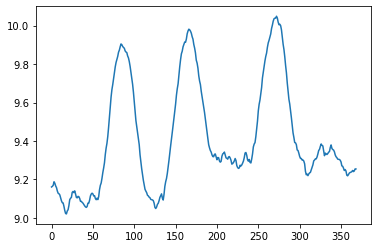

In [0]:
plt.plot(x_ref,df['entropy'])

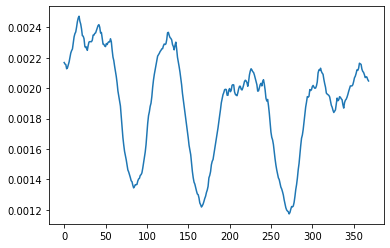

In [0]:
plt.plot(x_ref,df['ASM'])

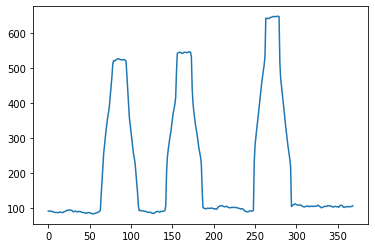

In [0]:
plt.plot(x_ref,df['constrast'])   

In [0]:
print(np.max(df['constrast']))
print(np.argmax(df['constrast']))


649.1363244667014
277


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


509.94278420915714


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


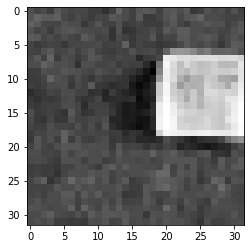

In [0]:
Num=np.argmax(df['constrast'])
Posicao=int(Num-Sub_Size/2)
plt.imshow(Cada_foto[Posicao].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[Posicao]) 

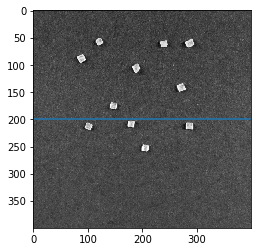

In [0]:
xv=[]
yv=[]
for i in range(400):
  xv.append(i)
  yv.append((Crop+Row_Crop/2))
plt.imshow(ww[0], cmap = "gray")
plt.plot(xv,yv)


In [0]:
x=[]
y=[]
for i in range(400):
  x.append(i)
  y.append(Crop)

89.57645031217481


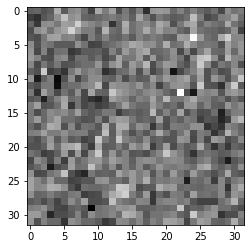

In [0]:
n=5
plt.imshow(Cada_foto[n].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[n])  


86.6014974635796


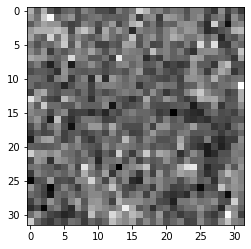

In [0]:
n=50
plt.imshow(Cada_foto[n].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[n])

In [0]:
np.array(Cada_foto).shape

(369, 1024)

86.6014974635796


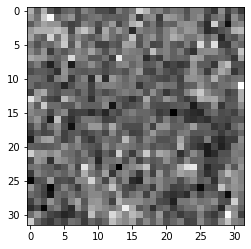

In [0]:
plt.imshow(Cada_foto[50].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[50])  

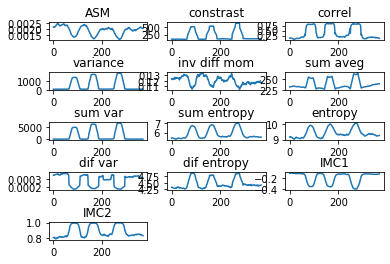

In [0]:

for i in range(1, 14):
    plt.subplot(5, 3, i)
    plt.plot(x_ref,df[Nomes[i-1]])
    plt.subplots_adjust(hspace = 1.8)
    #fig.tight_layout() 
    plt.title(Nomes[i-1])
    #plt.ylabel(Nomes[i-1])



    #plt.text(0.5, 0.5,Nomes[i-1]),fontsize=18, ha='center')